# Métodos de Clustering
Vamos ver algumas métodos de clustering implementados nos packages dop Python.

KMeans(n_clusters=3, random_state=0)


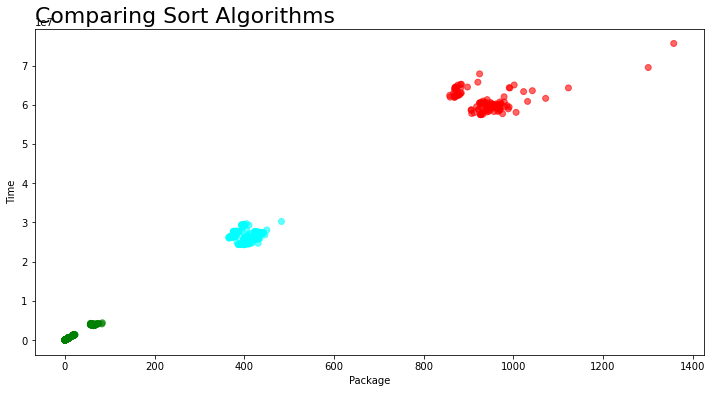

In [6]:
# Clustering com kmeans
# temos de fornecer o valor de k (#clusters)
from sklearn.cluster import KMeans
from matplotlib.lines import Line2D
import pandas as pd
import matplotlib.pyplot as plt

file_name = 'final.csv'
df = pd.read_csv(file_name, header=0, delimiter=",", decimal=".", names=['Program', 'Package', 'Core(s)', 'GPU', 'DRAM?', 'Time(sec)', 'Peak Memory Usage (KB)', 'PowerCap (uW)'])
df = df.drop(columns=['Program'])

# k means
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
# get centroids
df['cluster'] = kmeans.fit_predict(df)
print(kmeans)

centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids]
cen_y = [i[1] for i in centroids]
# add to df
df['cen_x'] = df.cluster.map({0: cen_x[0], 1: cen_x[1], 2: cen_x[2]})
df['cen_y'] = df.cluster.map({0: cen_y[0], 1: cen_y[1], 2: cen_y[2]})

# define and map colors
colors = ['red', 'green', 'cyan', 'blue']
df['c'] = df.cluster.map({0: colors[0], 1: colors[1], 2: colors[2]})

plt.figure(figsize=(12, 6))
plt.scatter(df['Package'], df['Time(sec)'], c=df.c, alpha=0.6)

# create a list of legend elements
legend_elements = [Line2D([0], [0], marker='o', color='w',
                          label='Cluster {}'.format(i),
                          markerfacecolor=mcolor, markersize=5)
                   for i, mcolor in enumerate(colors)]

# plot legend
plt.legend(handles=legend_elements, loc='lower right')

# title and labels
plt.title('Comparing Sort Algorithms', loc='left', fontsize=22)
plt.xlabel('Package')
plt.ylabel('Time')

plt.show()


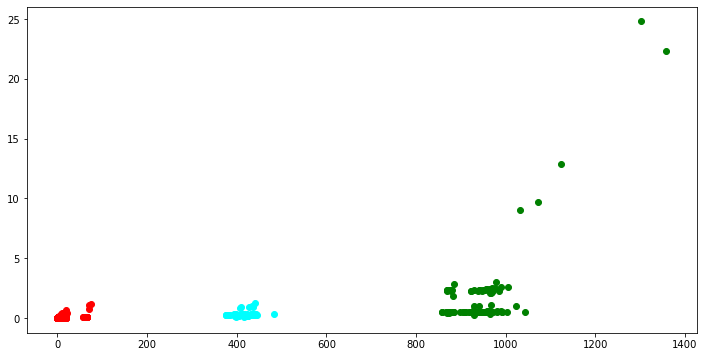

In [18]:
# Implementação de EM Clustering
# Usa procedimento de Expectation Maximization via Gaussion Mixture Models
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D




# dataset
file_name = 'final.csv'
df = pd.read_csv(file_name, header=0, delimiter=",", decimal=".", names=['Program', 'Package', 'Core(s)', 'GPU', 'DRAM?', 'Time(sec)', 'Peak Memory Usage (KB)', 'PowerCap (uW)'])
df = df.drop(columns=['Program'])
# preprocessa categoricos com one hot encoding
#data = pd.get_dummies(data, columns=["test"])  

# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=8)
#gmm.fit(data)
#predictions from gmm
labels = gmm.fit_predict(df)
frame = pd.DataFrame(df)

frame['cluster'] = labels
frame.columns = ['Package', 'Core(s)', 'GPU', 'DRAM?', 'Time(sec)',
       'Peak Memory Usage (KB)', 'PowerCap (uW)', 'cluster']

colors=['red','green','cyan','yellow']
plt.figure(figsize=(12,6))
for k in range(0,3):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["Package"],data["GPU"],c=colors[k])

# create a list of legend elem
## markers / records
legend_elements = [Line2D([0], [0], marker='o', color='w', 
                          label='Cluster {}'.format(i+1), 
               markerfacecolor=mcolor, markersize=5) 
for i, mcolor in enumerate(colors)]
# plot legend





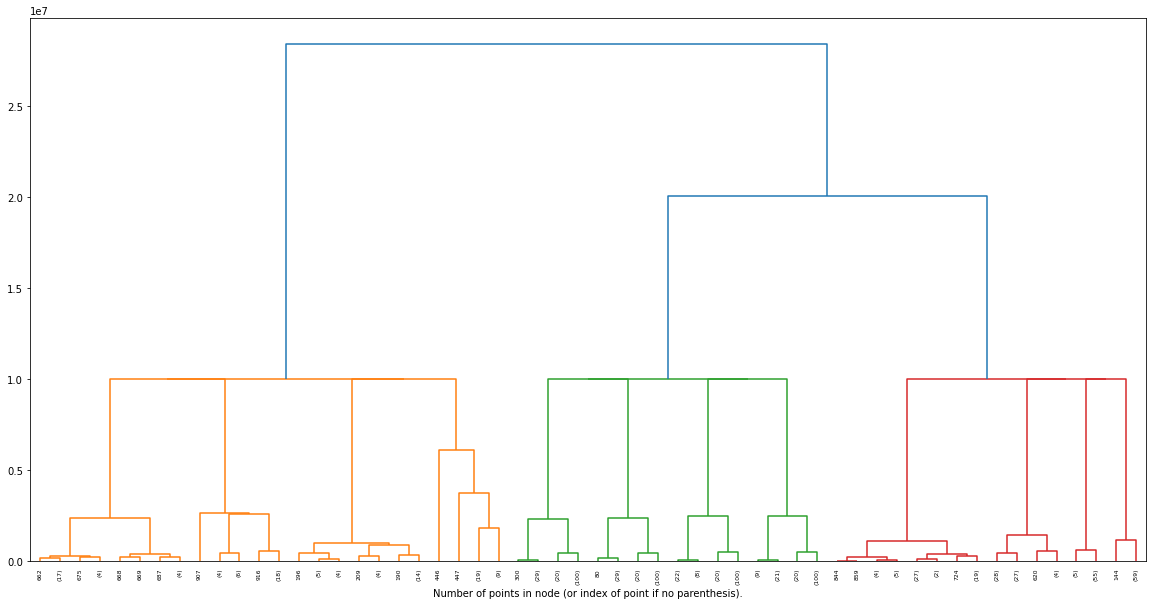

In [55]:
link = linkage(b, method='single', metric='euclidean')
plt.figure(figsize=(20,10))
dendrogram(link,truncate_mode="level",p=5)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")

plt.show()

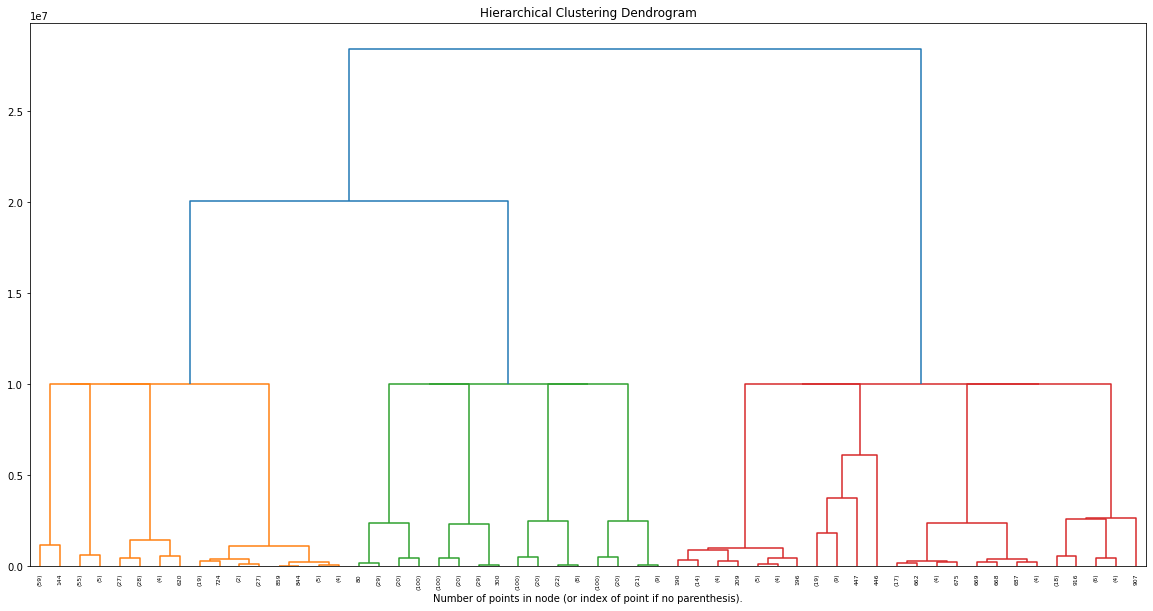

In [60]:
# Agglomerative Clustering (bottom-up construction)

import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


# Read the CSV file and drop the 'Program' column
df = pd.read_csv('final.csv', header=0, delimiter=",", decimal=".")
df = df.drop(columns='Program')

# Perform agglomerative clustering
clustering = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='single', affinity='euclidean')
model = clustering.fit(df)

# Plot the dendrogram
plt.figure(figsize=(20, 10))
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(model, truncate_mode="level", p=5)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()
